In [25]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [26]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

print(df.head())
print("\n\nSize:" ,df.size)
print("Shape:" ,df.shape)
print("Columns:" ,df.columns)
print("\nUnique Labels:" ,df['label'].unique())
print("\nType:" ,df.dtypes)
print("\nValue Count:" ,df['label'].value_counts())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


Size: 17600
Shape: (2200, 8)
Columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Unique Labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Type: N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Value Count: label
ri

In [27]:
#Seperating features and target label 
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []


# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Decision Tree
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
DecisionTree.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = DecisionTree.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Decision Tree')

# Print results
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#Cross Validation--> used because we are still deciding in the model 
score = cross_val_score(DecisionTree, features, target,cv=5)
print(f"Cross Validation Accuracy: {score.mean():.4f}")



#Saving the model
import pickle
DT_pkl_filename = 'models/DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()


Decision Tree Accuracy: 90.00%
Precision: 0.8572
Recall: 0.9000
F1-Score: 0.8707
Cross Validation Accuracy: 0.9141


Guassian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Training
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)

#Predict
predicted_values = NaiveBayes.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Naive Bayes')

# Print results
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


#Cross Validation--> used because we are still deciding in the model 
score = cross_val_score(NaiveBayes, features, target,cv=5)
print(f"Cross Validation Accuracy: {score.mean():.4f}")

#Saving the model
import pickle
NB_pkl_filename = 'models/NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()



Naive Bayes Accuracy: 99.09%
Precision: 0.9920
Recall: 0.9909
F1-Score: 0.9906
Cross Validation Accuracy: 0.9950


Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Training SVM model
SVM = SVC(kernel='linear', random_state=2)  
SVM.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = SVM.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('SVM')

# Print results
print(f"SVM Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (used because we are still deciding on the model)
score = cross_val_score(SVM, features, target, cv=5)  # Use SVM, Xtrain, and Ytrain
print(f"Cross Validation Accuracy: {score.mean():.4f}")

# Saving the SVM model
SVM_pkl_filename = 'models/SVMClassifier.pkl'
with open(SVM_pkl_filename, 'wb') as SVM_Model_pkl:
    pickle.dump(SVM, SVM_Model_pkl)


SVM Accuracy: 97.73%
Precision: 0.9775
Recall: 0.9773
F1-Score: 0.9773
Cross Validation Accuracy: 0.9850


Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Training Logistic Regression model
LogisticReg = LogisticRegression(random_state=2, max_iter=200)  # You can adjust hyperparameters
LogisticReg.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = LogisticReg.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Logistic Regression')

# Print results
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (used because we are still deciding on the model)
score = cross_val_score(LogisticReg, features, target, cv=5)  # Use LogisticReg, Xtrain, and Ytrain
print(f"Cross Validation Accuracy: {score.mean():.4f}")

#import pickle
#LR_pkl_filename = 'LogisticRegression.pkl'
#LR_Model_pkl = open(DT_pkl_filename, 'wb')
#pickle.dump(LogisticReg, LR_Model_pkl)
#LR_Model_pkl.close()


Logistic Regression Accuracy: 96.14%
Precision: 0.9632
Recall: 0.9614
F1-Score: 0.9605
Cross Validation Accuracy: 0.9655


Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle


# Training Random Forest model
RF = RandomForestClassifier(random_state=2, n_estimators=100)  # You can adjust n_estimators and other hyperparameters
RF.fit(Xtrain, Ytrain)

# Predict on test data
predicted_values = RF.predict(Xtest)

# Compute metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='weighted')
recall = recall_score(Ytest, predicted_values, average='weighted')
f1 = f1_score(Ytest, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('Random Forest')

# Print results
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (used because we are still deciding on the model)
score = cross_val_score(RF, features, target, cv=5)  
print(f"Cross Validation Accuracy: {score.mean():.4f}")

# Saving the Random Forest model
RF_pkl_filename = 'models/RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()


Random Forest Accuracy: 99.55%
Precision: 0.9958
Recall: 0.9955
F1-Score: 0.9954
Cross Validation Accuracy: 0.9927


XGBoost


In [33]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Encode string labels to numeric values
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)  # Convert string labels to numbers
Ytest_encoded = label_encoder.transform(Ytest)  # Transform test labels using the same encoding

# Training XGBoost model
XB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2, n_estimators=100)
XB.fit(Xtrain, Ytrain_encoded)  # Use encoded labels

# Predict on test data
predicted_values = XB.predict(Xtest)

# Convert predictions back to original labels (optional)
predicted_labels = label_encoder.inverse_transform(predicted_values)

# Compute metrics
accuracy = accuracy_score(Ytest_encoded, predicted_values)
precision = precision_score(Ytest_encoded, predicted_values, average='weighted')
recall = recall_score(Ytest_encoded, predicted_values, average='weighted')
f1 = f1_score(Ytest_encoded, predicted_values, average='weighted')

# Store accuracy in lists
acc.append(accuracy)
model.append('XGBoost')

# Print results
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation (use encoded labels)
score = cross_val_score(XB, Xtrain, Ytrain_encoded, cv=5)  
print(f"Cross Validation Accuracy: {score.mean():.4f}")

# Saving the XGBoost model
XB_pkl_filename = 'models/XGBoost.pkl'
with open(XB_pkl_filename, 'wb') as XB_Model_pkl:
    pickle.dump(XB, XB_Model_pkl)


XGBoost Accuracy: 99.09%
Precision: 0.9913
Recall: 0.9909
F1-Score: 0.9908
Cross Validation Accuracy: 0.9858


Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

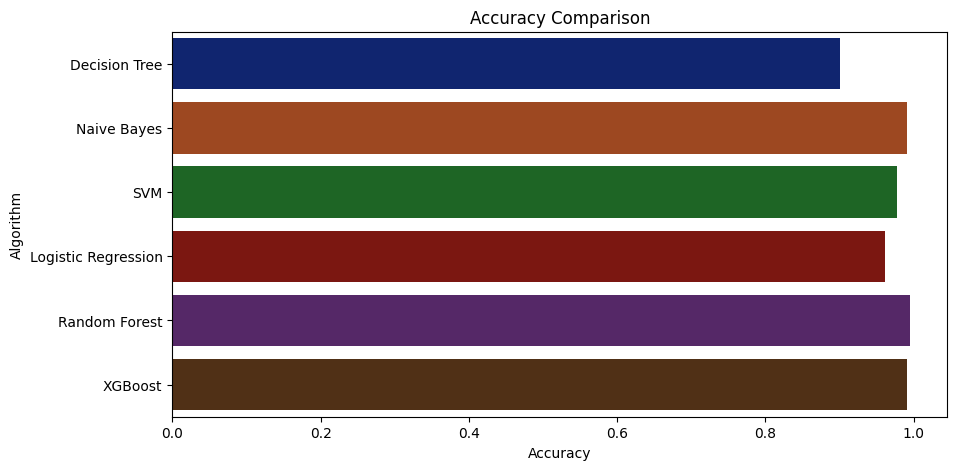

In [34]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')


In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9772727272727273
Logistic Regression --> 0.9613636363636363
Random Forest --> 0.9954545454545455
XGBoost --> 0.990909090909091


Making a Prediction

In [36]:
N = 60
P = 60
k = 60
temperature = 25
humidity = 40
ph = 5.0
rainfall = 150

data = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
print(data)
prediction = DecisionTree.predict(data)
print(prediction)

[[ 60.  60.  60.  25.  40.   5. 150.]]
['jute']


In [37]:
import joblib 

N = 50
P = 50
k = 60
temperature = 30
humidity = 45
ph = 6
rainfall = 140

model_path = "models\RandomForest.pkl"
model = joblib.load(model_path)
print("Model loaded successfully")

data = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
print(data)

prediction = model.predict(data)  # Correcting prediction statement
print("Prediction:", prediction)

prediction2 = RF.predict(data)
print(prediction2)



Model loaded successfully
[[ 50  50  60  30  45   6 140]]
Prediction: ['papaya']
['papaya']
